In [61]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_detail = pd.read_csv("product details (1).csv")

In [5]:
data_catlog = pd.read_csv("products catalog (1).csv")

In [6]:
data_detail.head()

,ProductID,ProductName,ProductBrand
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx


In [7]:
data_detail.shape

(12491, 3)

In [8]:
data_catlog.head()

,Gender,Price (INR),NumImages,ID,Description,PrimaryColor
0,Women,593,5,10182131,"Off-White printed woven A-line top, has a rou...",White
1,Men,6396,5,10052169,Display: AnalogueMovement: QuartzPower source:...,Black
2,Women,599,5,10168643,"Blue printed knitted regular top, has a high ...",Blue
3,Men,1034,5,10155427,"Grey and Purple checked smart casual shirt, ha...",Grey
4,Men,477,3,10191059,Beige and Brown striped beltReversible: NoStre...,Brown


In [9]:
data_catlog.describe(include = "all")

,Gender,Price (INR),NumImages,ID,Description,PrimaryColor
count,12491,12491.000000,12491.000000,1.249100e+04,12491,11597
unique,6,NaN,NaN,NaN,10435,27
top,Women,NaN,NaN,NaN,"Blue medium wash 5-pocket mid-rise jeans, clea...",Blue
freq,5126,NaN,NaN,NaN,54,3443
mean,NaN,1452.660956,4.913698,9.917160e+06,NaN,NaN
std,NaN,2118.503976,1.092333,1.438006e+06,NaN,NaN
min,NaN,90.000000,1.000000,1.012060e+05,NaN,NaN
25%,NaN,649.000000,5.000000,1.006215e+07,NaN,NaN
50%,NaN,920.000000,5.000000,1.015463e+07,NaN,NaN
75%,NaN,1499.000000,5.000000,1.021565e+07,NaN,NaN


In [10]:
data_catlog.Gender.unique()

array(['Women', 'Men', 'Unisex', 'Boys', 'Girls', 'Unisex Kids'],
      dtype=object)

In [11]:
data_catlog.Gender.value_counts()

Women          5126
Men            4591
Unisex         1188
Boys           1100
Girls           440
Unisex Kids      46
Name: Gender, dtype: int64

In [12]:
x = []
for i in data_catlog.Gender:
    if i=="Women" or i == "Girls":
        x.append("F")
    elif i=="Men" or i == "Boys":
        x.append("M")
    else:
        x.append("U")
        
data_catlog["Gender_V1"] = x          
    
    

In [13]:
data_catlog.head()

,Gender,Price (INR),NumImages,ID,Description,PrimaryColor,Gender_V1
0,Women,593,5,10182131,"Off-White printed woven A-line top, has a rou...",White,F
1,Men,6396,5,10052169,Display: AnalogueMovement: QuartzPower source:...,Black,M
2,Women,599,5,10168643,"Blue printed knitted regular top, has a high ...",Blue,F
3,Men,1034,5,10155427,"Grey and Purple checked smart casual shirt, ha...",Grey,M
4,Men,477,3,10191059,Beige and Brown striped beltReversible: NoStre...,Brown,M


In [14]:
data_catlog.Gender_V1.value_counts()

M    5691
F    5566
U    1234
Name: Gender_V1, dtype: int64

In [15]:
### age flag - kids , adults
# gender = boys ,girls,unisex kids -- kids 
# gender = men, women,unisex -- adults

In [16]:
x = np.where ((data_catlog["Gender"]=="Boys")|(data_catlog["Gender"]=="Girls")|(data_catlog["Gender"]=="Unisex Kids"),"Kids","adults")

In [47]:
data_catlog["age_flag"]=x

In [48]:
data_catlog.age_flag.value_counts()

adults    10905
Kids       1586
Name: age_flag, dtype: int64

In [19]:
data_catlog

,Gender,Price (INR),NumImages,ID,Description,PrimaryColor,Gender_V1,age_flag
0,Women,593,5,10182131,"Off-White printed woven A-line top, has a rou...",White,F,adults
1,Men,6396,5,10052169,Display: AnalogueMovement: QuartzPower source:...,Black,M,adults
2,Women,599,5,10168643,"Blue printed knitted regular top, has a high ...",Blue,F,adults
3,Men,1034,5,10155427,"Grey and Purple checked smart casual shirt, ha...",Grey,M,adults
4,Men,477,3,10191059,Beige and Brown striped beltReversible: NoStre...,Brown,M,adults
...,...,...,...,...,...,...,...,...
12486,Women,6375,5,10211803,"A pair of black pointed toe heeled boots, has ...",Black,F,adults
12487,Boys,559,7,10138361,"Blue faded casual shirt, has a hood, long slee...",Blue,M,Kids
12488,Men,1399,5,10201271,A pair of brown comfort sandalsLeather upper w...,Brown,M,adults
12489,Women,976,5,10246229,"A pair of black solid peep toes, has regular s...",Black,F,adults


In [20]:
data_catlog['v1'] = data_catlog.Description.apply(lambda x : len(x))

In [21]:
data_catlog.head()

,Gender,Price (INR),NumImages,ID,Description,PrimaryColor,Gender_V1,age_flag,v1
0,Women,593,5,10182131,"Off-White printed woven A-line top, has a rou...",White,F,adults,102
1,Men,6396,5,10052169,Display: AnalogueMovement: QuartzPower source:...,Black,M,adults,317
2,Women,599,5,10168643,"Blue printed knitted regular top, has a high ...",Blue,F,adults,77
3,Men,1034,5,10155427,"Grey and Purple checked smart casual shirt, ha...",Grey,M,adults,110
4,Men,477,3,10191059,Beige and Brown striped beltReversible: NoStre...,Brown,M,adults,141


In [22]:
data_catlog.PrimaryColor.value_counts()

Blue         3443
 Black       1640
 Red         1543
 Green        908
 White        880
 Grey         684
 Brown        473
 Yellow       406
 Pink         391
 Gold         236
 Beige        236
 Maroon       187
 Orange       130
 Silver       111
 Purple        65
 Burgundy      64
 Khaki         56
 Navy          54
 Lavender      19
 Matte         17
 Mustard       15
 Magenta       13
 Charcoal      10
 Rose           8
 Platinum       3
 Bronze         3
 Peach          2
Name: PrimaryColor, dtype: int64

In [23]:
data_detail.describe(include = "all")

,ProductID,ProductName,ProductBrand
count,1.249100e+04,12491,12491
unique,NaN,10761,677
top,NaN,Parx Men Blue Slim Fit Checked Casual Shirt,Indian Terrain
freq,NaN,16,971
mean,9.917160e+06,NaN,NaN
std,1.438006e+06,NaN,NaN
min,1.012060e+05,NaN,NaN
25%,1.006215e+07,NaN,NaN
50%,1.015463e+07,NaN,NaN
75%,1.021565e+07,NaN,NaN


In [24]:
data_new = pd.merge(data_catlog,data_detail,how = "left",left_on = "ID",right_on = "ProductID")

In [25]:
data_new.head()

,Gender,Price (INR),NumImages,ID,Description,PrimaryColor,Gender_V1,age_flag,v1,ProductID,ProductName,ProductBrand
0,Women,593,5,10182131,"Off-White printed woven A-line top, has a rou...",White,F,adults,102,10182131,Bhama Couture Women Off-White Printed Pure Cot...,Bhama Couture
1,Men,6396,5,10052169,Display: AnalogueMovement: QuartzPower source:...,Black,M,adults,317,10052169,Titan Octane Men Black Analogue watch NL90104KM02,Titan
2,Women,599,5,10168643,"Blue printed knitted regular top, has a high ...",Blue,F,adults,77,10168643,Cation Women Blue Printed Crop Top,Cation
3,Men,1034,5,10155427,"Grey and Purple checked smart casual shirt, ha...",Grey,M,adults,110,10155427,Indian Terrain Men Grey & Purple Slim Fit Chec...,Indian Terrain
4,Men,477,3,10191059,Beige and Brown striped beltReversible: NoStre...,Brown,M,adults,141,10191059,Fastrack Men Beige & Brown Striped Belt,Fastrack


In [26]:
data_new = data_new.drop_duplicates()

In [27]:
data_new.isnull().sum()

Gender            0
Price (INR)       0
NumImages         0
ID                0
Description       0
PrimaryColor    894
Gender_V1         0
age_flag          0
v1                0
ProductID         0
ProductName       0
ProductBrand      0
dtype: int64

In [28]:
data_new.shape

(12491, 12)

In [29]:
data_new.ProductBrand[0]

'Bhama Couture'

In [30]:
data_new.PrimaryColor[0]


' White'

In [31]:
data_new["PrimaryColor"] = data_new.PrimaryColor.str.strip()

In [32]:
data_new.PrimaryColor[0] # remove white space from leading edge 

'White'

In [33]:
data_new['PrimaryColor'] = data_new.PrimaryColor.fillna('others')

# done missing value treatment # By central tendecy value (mean ,mode, median)
#if missing percent is > 50% we drop that variable
#if the data type is object then we replace with = MODE 
# if the data type is numeric - no outlier - mean
# if the data type is numeric - With Outlier - Median 

In [34]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12491 entries, 0 to 12490
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        12491 non-null  object
 1   Price (INR)   12491 non-null  int64 
 2   NumImages     12491 non-null  int64 
 3   ID            12491 non-null  int64 
 4   Description   12491 non-null  object
 5   PrimaryColor  12491 non-null  object
 6   Gender_V1     12491 non-null  object
 7   age_flag      12491 non-null  object
 8   v1            12491 non-null  int64 
 9   ProductID     12491 non-null  int64 
 10  ProductName   12491 non-null  object
 11  ProductBrand  12491 non-null  object
dtypes: int64(5), object(7)
memory usage: 1.5+ MB


In [46]:
data_new.rename(columns = {'(Price (INR)':'Price'}, inplace = True)

In [45]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12491 entries, 0 to 12490
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        12491 non-null  object
 1   Price (INR)   12491 non-null  int64 
 2   NumImages     12491 non-null  int64 
 3   ID            12491 non-null  int64 
 4   Description   12491 non-null  object
 5   PrimaryColor  12491 non-null  object
 6   Gender_V1     12491 non-null  object
 7   age_flag      12491 non-null  object
 8   v1            12491 non-null  int64 
 9   ProductID     12491 non-null  int64 
 10  ProductName   12491 non-null  object
 11  ProductBrand  12491 non-null  object
dtypes: int64(5), object(7)
memory usage: 1.5+ MB


In [ ]:
#BIVERIATE Analysis 

In [49]:
df_1 = data_new

In [50]:
df_1.head()

,Gender,Price (INR),NumImages,ID,Description,PrimaryColor,Gender_V1,age_flag,v1,ProductID,ProductName,ProductBrand
0,Women,593,5,10182131,"Off-White printed woven A-line top, has a rou...",White,F,adults,102,10182131,Bhama Couture Women Off-White Printed Pure Cot...,Bhama Couture
1,Men,6396,5,10052169,Display: AnalogueMovement: QuartzPower source:...,Black,M,adults,317,10052169,Titan Octane Men Black Analogue watch NL90104KM02,Titan
2,Women,599,5,10168643,"Blue printed knitted regular top, has a high ...",Blue,F,adults,77,10168643,Cation Women Blue Printed Crop Top,Cation
3,Men,1034,5,10155427,"Grey and Purple checked smart casual shirt, ha...",Grey,M,adults,110,10155427,Indian Terrain Men Grey & Purple Slim Fit Chec...,Indian Terrain
4,Men,477,3,10191059,Beige and Brown striped beltReversible: NoStre...,Brown,M,adults,141,10191059,Fastrack Men Beige & Brown Striped Belt,Fastrack


In [53]:
df_1.Gender_V1.value_counts()

M    5691
F    5566
U    1234
Name: Gender_V1, dtype: int64

In [56]:
df_1.groupby('Gender_V1')['Price (INR)'].mean() # Perform Bivariate analysis to find avaerage ordered value of gendres 

Gender_V1
F    1323.562702
M    1434.021613
U    2120.924635
Name: Price (INR), dtype: float64

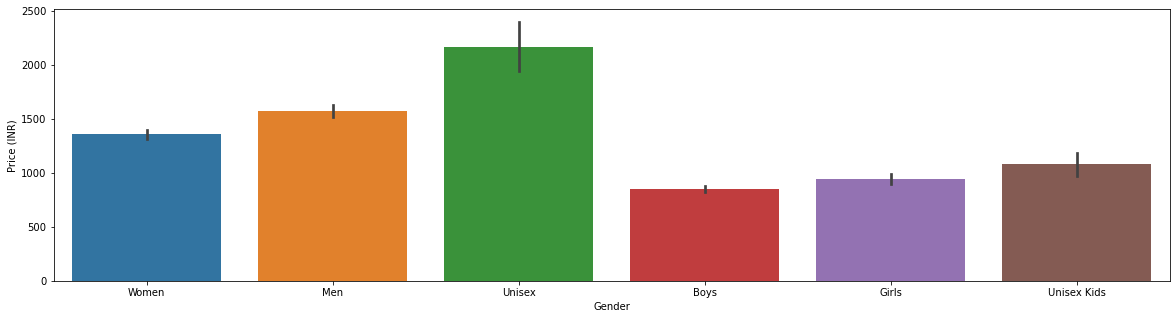

In [71]:
plt.figure(figsize = (20,5))
sns.barplot(x='Gender',y='Price (INR)',data = df_1);
plt.show()

In [66]:
df_1.groupby('Gender_V1')['NumImages'].mean() # from this we found the avg. order value of unisex is higher but the images 

#they watch is less. we will suggest to increse number of images 

Gender_V1
F    4.951671
M    4.981198
U    4.431118
Name: NumImages, dtype: float64

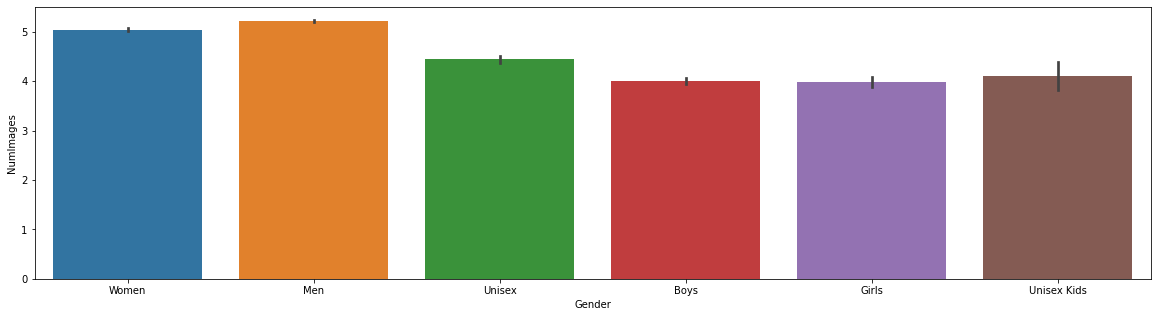

In [72]:
plt.figure(figsize = (20,5))
sns.barplot(x='Gender' , y = 'NumImages' ,data = df_1);
plt.show()

In [73]:
df_1.ProductBrand.value_counts()

Indian Terrain    971
Puma              345
Pepe Jeans        340
AURELIA           307
Flying Machine    301
                 ... 
Lychee bags         1
CERIZ               1
Fourwalls           1
Daffodils           1
FS Mini Klub        1
Name: ProductBrand, Length: 677, dtype: int64

In [80]:
df_2 = df_1[df_1['Price (INR)']<1500]


In [81]:
df_2.ProductBrand.value_counts()

Indian Terrain    859
Pepe Jeans        314
Flying Machine    288
AURELIA           259
Roadster          211
                 ... 
Devis               1
SASSAFRAS           1
LilPicks            1
Crimsoune Club      1
FS Mini Klub        1
Name: ProductBrand, Length: 579, dtype: int64

In [82]:
df_3 = df_1[df_1['Price (INR)']>=1500]

In [83]:
df_3.ProductBrand.value_counts()

Puma                  306
Calvin Klein Jeans    131
Indian Terrain        112
Titan                 104
WROGN                  92
                     ... 
DEYANN                  1
Proline Active          1
Organic Harvest         1
OFF LIMITS              1
pinwheel                1
Name: ProductBrand, Length: 300, dtype: int64

In [86]:
temp1 = df_1[df_1["ProductBrand"]=='Indian Terrain']

In [89]:
temp1.describe(include="all")

,Gender,Price (INR),NumImages,ID,Description,PrimaryColor,Gender_V1,age_flag,v1,ProductID,ProductName,ProductBrand
count,971,971.000000,971.000000,9.710000e+02,971,971,971,971,971.000000,9.710000e+02,971,971
unique,2,NaN,NaN,NaN,794,18,1,2,NaN,NaN,737,1
top,Men,NaN,NaN,NaN,"White printed T-shirt, has a round neck, and l...",Blue,M,adults,NaN,NaN,Indian Terrain Men Blue & White Slim Fit Check...,Indian Terrain
freq,665,NaN,NaN,NaN,8,368,971,665,NaN,NaN,10,971
mean,NaN,966.057673,5.000000,1.014762e+07,NaN,NaN,NaN,NaN,97.958805,1.014762e+07,NaN,NaN
std,NaN,460.676176,0.951396,9.667644e+03,NaN,NaN,NaN,NaN,30.424223,9.667644e+03,NaN,NaN
min,NaN,314.000000,3.000000,1.013445e+07,NaN,NaN,NaN,NaN,48.000000,1.013445e+07,NaN,NaN
25%,NaN,629.000000,5.000000,1.013861e+07,NaN,NaN,NaN,NaN,69.000000,1.013861e+07,NaN,NaN
50%,NaN,919.000000,5.000000,1.014886e+07,NaN,NaN,NaN,NaN,103.000000,1.014886e+07,NaN,NaN
75%,NaN,1079.000000,5.000000,1.015405e+07,NaN,NaN,NaN,NaN,121.000000,1.015405e+07,NaN,NaN


In [ ]:
#so we found Indian Terrain is most selling brand in Mens wear in  both price range  

In [90]:
df_1[df_1['Gender_V1']=='F'].ProductBrand.value_counts()

AURELIA         307
W               261
Lavie           121
HERE&NOW        118
Roadster        108
               ... 
Devis             1
Slumber Jill      1
Foolzy            1
Keds              1
pinwheel          1
Name: ProductBrand, Length: 425, dtype: int64